In [13]:
import pandas as pd
import time

# Loading datasets
higher_ed_df = pd.read_csv('dataset/subset_higher_ed_ednum.csv')
some_college_df = pd.read_csv('dataset/subset_some_college_ednum.csv')
less_than_hs_df = pd.read_csv('dataset/subset_less_than_hs_ednum.csv')

from sklearn.preprocessing import LabelEncoder


# Dropping 'fnlgwt' and 'Education' features from all datasets as they are not useful or duplicated
higher_ed_df = higher_ed_df.drop(['fnlgwt', 'Education'], axis=1)
some_college_df = some_college_df.drop(['fnlgwt', 'Education'], axis=1)
less_than_hs_df = less_than_hs_df.drop(['fnlgwt', 'Education'], axis=1)

# Encoding categorical features in all datasets
def encode_features(df):
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])
    return df, label_encoders

higher_ed_df_encoded, higher_ed_encoders = encode_features(higher_ed_df.copy())
some_college_df_encoded, some_college_encoders = encode_features(some_college_df.copy())
less_than_hs_df_encoded, less_than_hs_encoders = encode_features(less_than_hs_df.copy())

print(higher_ed_encoders.keys())

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Defining the input features and target variable for each subset
X_higher_ed = higher_ed_df_encoded.drop('Income', axis=1)
y_higher_ed = higher_ed_df_encoded['Income']

X_some_college = some_college_df_encoded.drop('Income', axis=1)
y_some_college = some_college_df_encoded['Income']

X_less_than_hs = less_than_hs_df_encoded.drop('Income', axis=1)
y_less_than_hs = less_than_hs_df_encoded['Income']

def pca_P(x):
    feature_num = x.shape[1]
    print(int(feature_num/2))
    pca = PCA(n_components=int(feature_num/2))
    x_pca = pca.fit_transform(x)
    return pd.DataFrame(x_pca)

X_higher_ed_pca = pca_P(X_higher_ed)
X_some_college_pca = pca_P(X_some_college)
X_less_than_hs_pca = pca_P(X_less_than_hs)


from sklearn.model_selection import train_test_split

X_higher_ed_pca_train, X_higher_ed_pca_test, y_higher_ed_pca_train, y_higher_ed_pca_test = train_test_split(X_higher_ed_pca, y_higher_ed, test_size=0.1, random_state=42)

X_some_college_pca_train, X_some_college_pca_test, y_some_college_pca_train, y_some_college_pca_test = train_test_split(X_some_college_pca, y_some_college, test_size=0.1, random_state=42)

X_less_than_hs_pca_train, X_less_than_hs_pca_test, y_less_than_hs_pca_train, y_less_than_hs_pca_test = train_test_split(X_less_than_hs_pca, y_less_than_hs, test_size=0.1, random_state=42)

dict_keys(['Workclass', 'MaritalStatus', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country', 'Income'])
6
6
6


In [14]:
import pandas as pd

# 假设X_higher_ed, y_higher_ed等是pandas的DataFrame或Series，以下代码将它们分别保存到CSV文件中

# 存储“Higher Education”数据data/X_higher_ed_train.csv', index=False)
X_higher_ed_pca_train.to_csv('data_pca/X_higher_ed_train.csv', index=False)
X_higher_ed_pca_test.to_csv('data_pca/X_higher_ed_test.csv', index=False)
y_higher_ed_pca_train.to_csv('data_pca/y_higher_ed_train.csv', index=False)
y_higher_ed_pca_test.to_csv('data_pca/y_higher_ed_test.csv', index=False)

# 存储“Some College”数据集
X_some_college_pca_train.to_csv('data_pca/X_some_college_train.csv', index=False)
X_some_college_pca_test.to_csv('data_pca/X_some_college_test.csv', index=False)
y_some_college_pca_train.to_csv('data_pca/y_some_college_train.csv', index=False)
y_some_college_pca_test.to_csv('data_pca/y_some_college_test.csv', index=False)

# 存储“Less than High School”数据集
X_less_than_hs_pca_train.to_csv('data_pca/X_less_than_hs_train.csv', index=False)
X_less_than_hs_pca_test.to_csv('data_pca/X_less_than_hs_test.csv', index=False)
y_less_than_hs_pca_train.to_csv('data_pca/y_less_than_hs_train.csv', index=False)
y_less_than_hs_pca_test.to_csv('data_pca/y_less_than_hs_test.csv', index=False)


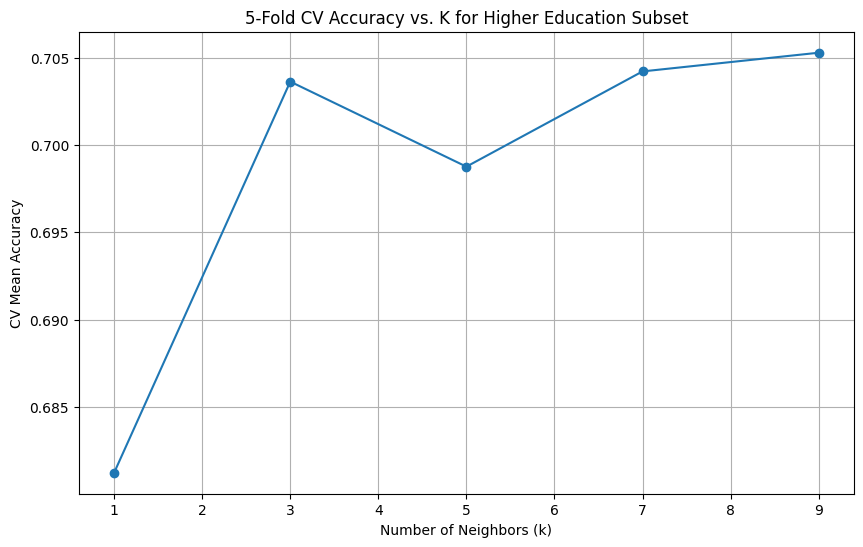

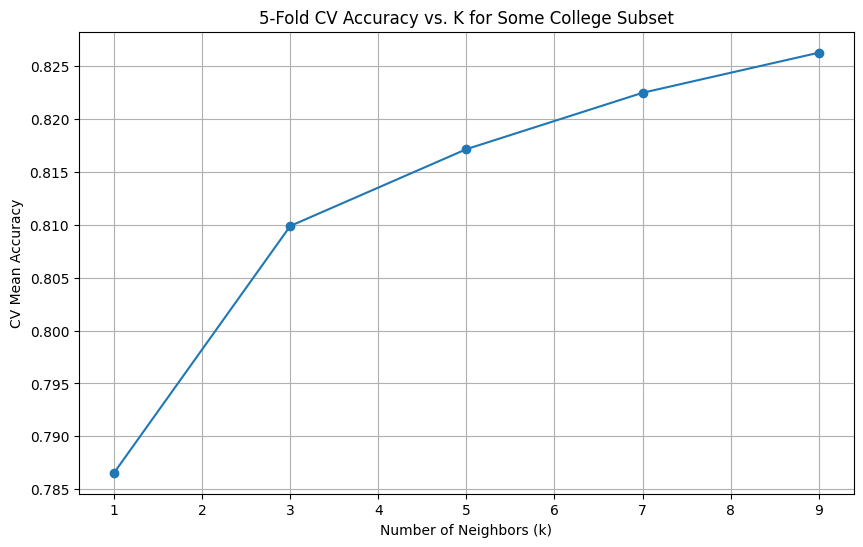

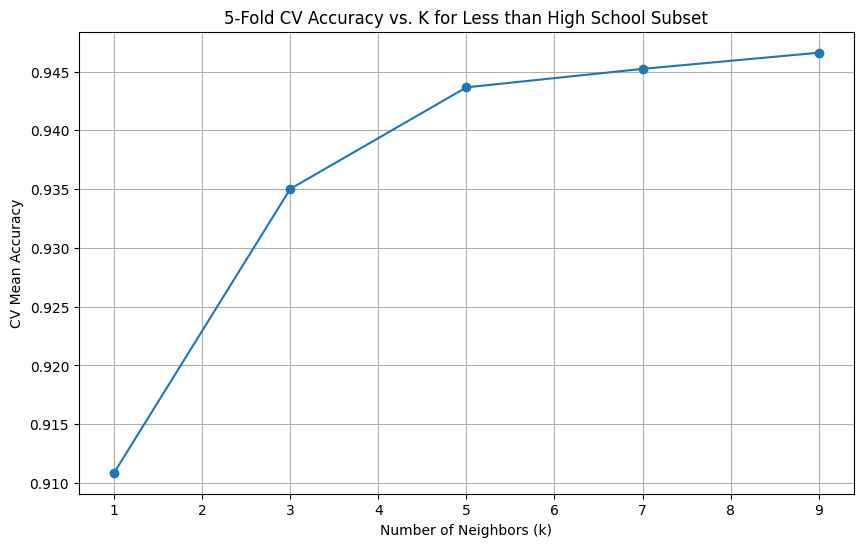

In [15]:
from sklearn.neighbors import KNeighborsClassifier
# Setting up K values for tuning
k_values = [1, 3, 5, 7, 9]

# Function to perform KNN tuning and plotting
def tune_knn(X, y, k_values, title):
    X = X.copy()
    y = y.copy()
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    mean_cv_scores = []
    for k in k_values:
        knn_clf = KNeighborsClassifier(n_neighbors=k)
        cv_scores = cross_val_score(knn_clf, X, y, cv=5)
        mean_cv_scores.append(np.mean(cv_scores))
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, mean_cv_scores, marker='o')
    plt.title(f'5-Fold CV Accuracy vs. K for {title}')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('CV Mean Accuracy')
    plt.grid(True)
    plt.savefig('./pa2b_pics/KNN_'+title+'.png')
    plt.show()

tune_knn(X_higher_ed_pca_train, y_higher_ed_pca_train, k_values, "Higher Education Subset")
tune_knn(X_some_college_pca_train, y_some_college_pca_train, k_values, "Some College Subset")
tune_knn(X_less_than_hs_pca_train, y_less_than_hs_pca_train, k_values, "Less than High School Subset")

Size of hidden layer:  (50,)
Size of hidden layer:  (100,)
Size of hidden layer:  (100, 50)
Size of hidden layer:  (100, 100)
Size of hidden layer:  (50, 50, 50)


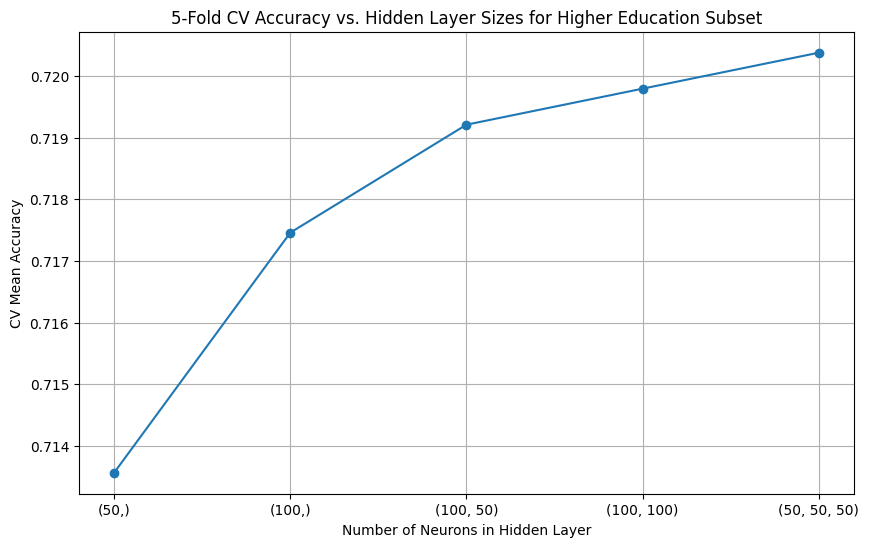

Size of hidden layer:  (50,)
Size of hidden layer:  (100,)
Size of hidden layer:  (100, 50)
Size of hidden layer:  (100, 100)
Size of hidden layer:  (50, 50, 50)


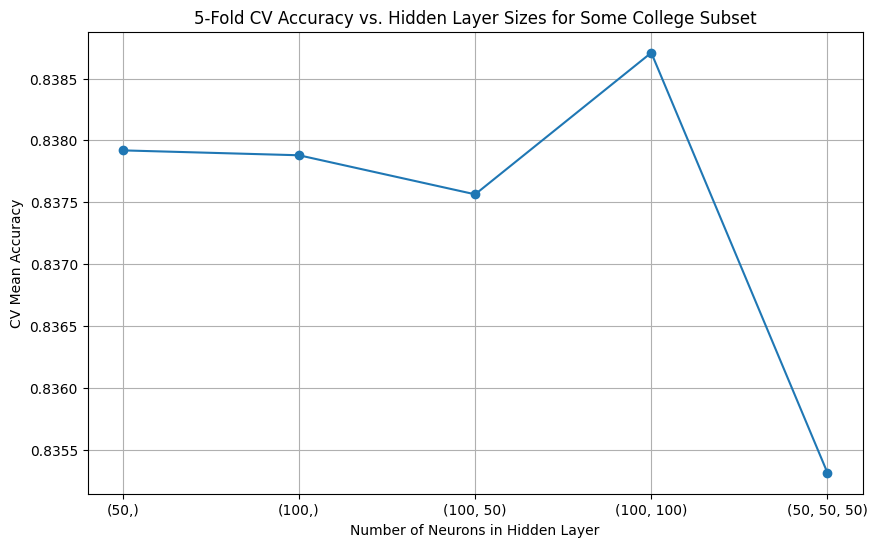

Size of hidden layer:  (50,)
Size of hidden layer:  (100,)
Size of hidden layer:  (100, 50)
Size of hidden layer:  (100, 100)
Size of hidden layer:  (50, 50, 50)


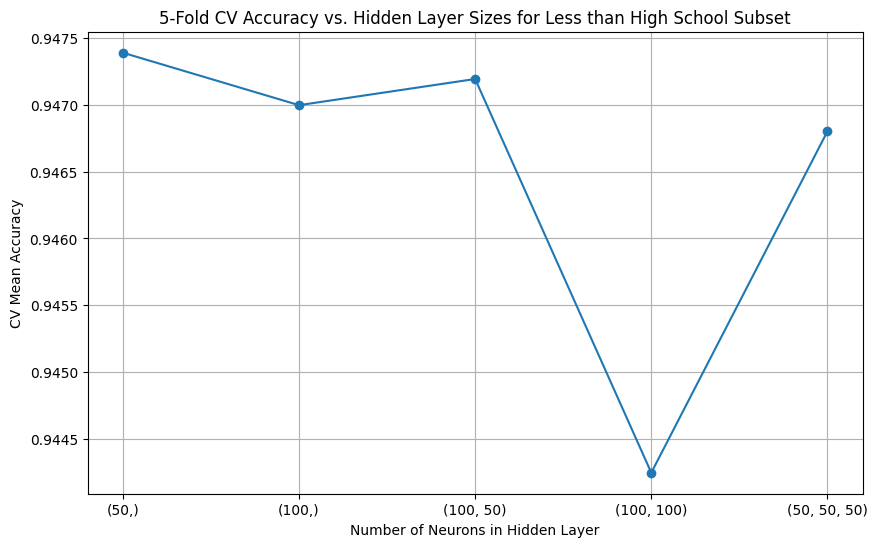

In [16]:
from sklearn.neural_network import MLPClassifier


# Configurations for the hidden layer sizes to test
hidden_layer_sizes = [(50,), (100,), (100,50), (100,100), (50,50,50)]

def tune_ann(X, y, hidden_layer_sizes, title):
    X = X.copy()
    y = y.copy()
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    mean_cv_scores_ann = []
    for size in hidden_layer_sizes:
        print('Size of hidden layer: ', size)
        ann_clf = MLPClassifier(hidden_layer_sizes=size, activation='relu', max_iter=1000)
        cv_scores = cross_val_score(ann_clf, X, y, cv=5)
        mean_cv_scores_ann.append(np.mean(cv_scores))
    
    plt.figure(figsize=(10, 6))
    plt.plot([str(size) for size in hidden_layer_sizes], mean_cv_scores_ann, marker='o')
    plt.title(f'5-Fold CV Accuracy vs. Hidden Layer Sizes for {title}')
    plt.xlabel('Number of Neurons in Hidden Layer')
    plt.ylabel('CV Mean Accuracy')
    plt.grid(True)
    plt.savefig('./pa2b_pics/ANN_'+title+'.png')
    plt.show()

tune_ann(X_higher_ed_pca_train, y_higher_ed_pca_train, hidden_layer_sizes, "Higher Education Subset")
tune_ann(X_some_college_pca_train, y_some_college_pca_train, hidden_layer_sizes, "Some College Subset")
tune_ann(X_less_than_hs_pca_train, y_less_than_hs_pca_train, hidden_layer_sizes, "Less than High School Subset")

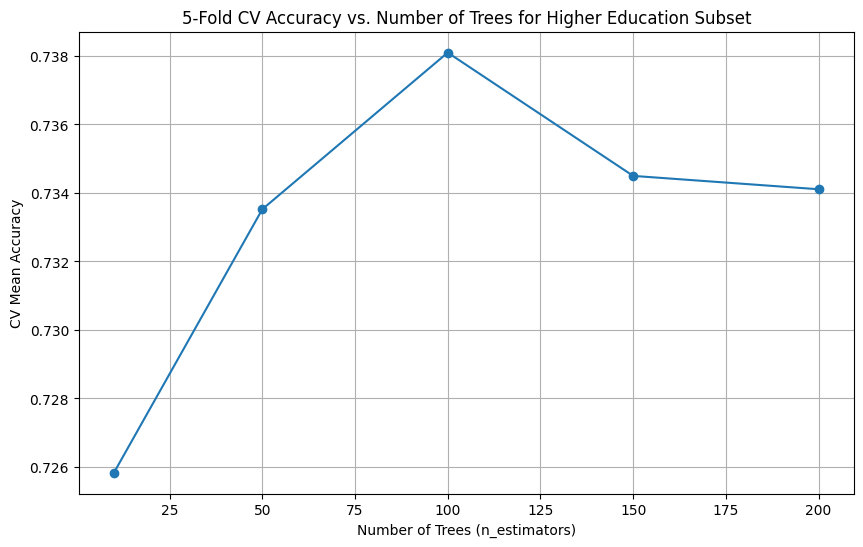

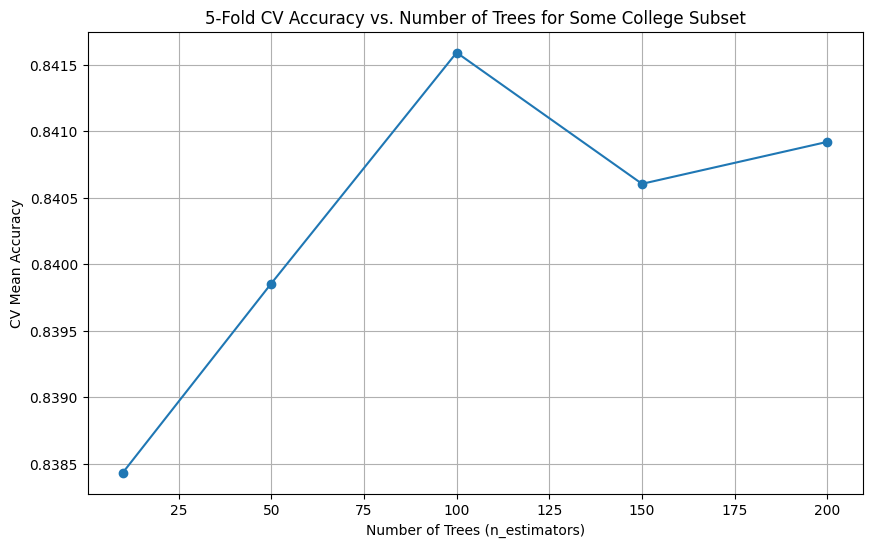

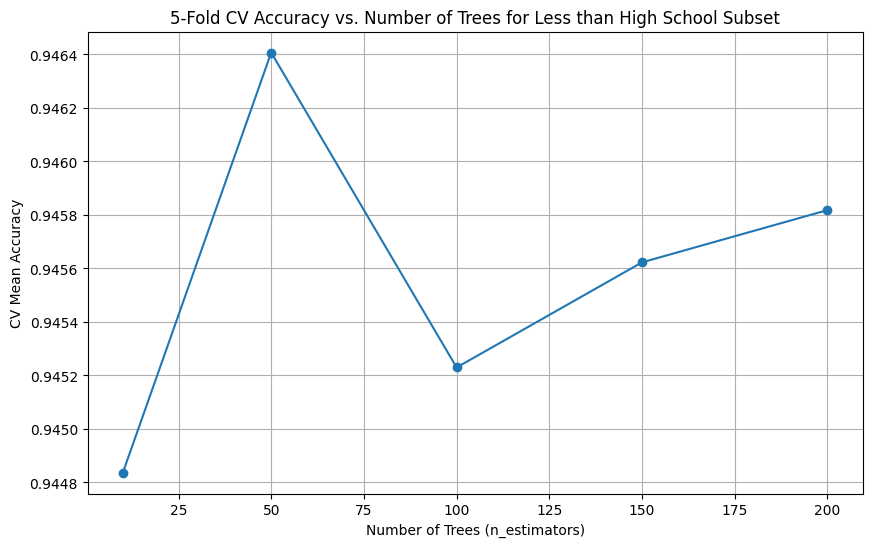

In [17]:
from sklearn.ensemble import RandomForestClassifier


def tune_random_forest(X, y, n_estimators_values, title):
    X = X.copy()
    y = y.copy()
    mean_cv_scores_rf = []
    
    for n_estimators in n_estimators_values:
        rf_clf = RandomForestClassifier(n_estimators=n_estimators)
        cv_scores = cross_val_score(rf_clf, X, y, cv=5)
        mean_cv_scores_rf.append(np.mean(cv_scores))
    
    plt.figure(figsize=(10, 6))
    plt.plot(n_estimators_values, mean_cv_scores_rf, marker='o')
    plt.title(f'5-Fold CV Accuracy vs. Number of Trees for {title}')
    plt.xlabel('Number of Trees (n_estimators)')
    plt.ylabel('CV Mean Accuracy')
    plt.grid(True)
    plt.savefig('./pa2b_pics/RandomForest_'+title+'.png')
    plt.show()

n_estimators_values = [10, 50, 100, 150, 200]

tune_random_forest(X_higher_ed_pca_train, y_higher_ed_pca_train, n_estimators_values, "Higher Education Subset")
tune_random_forest(X_some_college_pca_train, y_some_college_pca_train, n_estimators_values, "Some College Subset")
tune_random_forest(X_less_than_hs_pca_train, y_less_than_hs_pca_train, n_estimators_values, "Less than High School Subset")

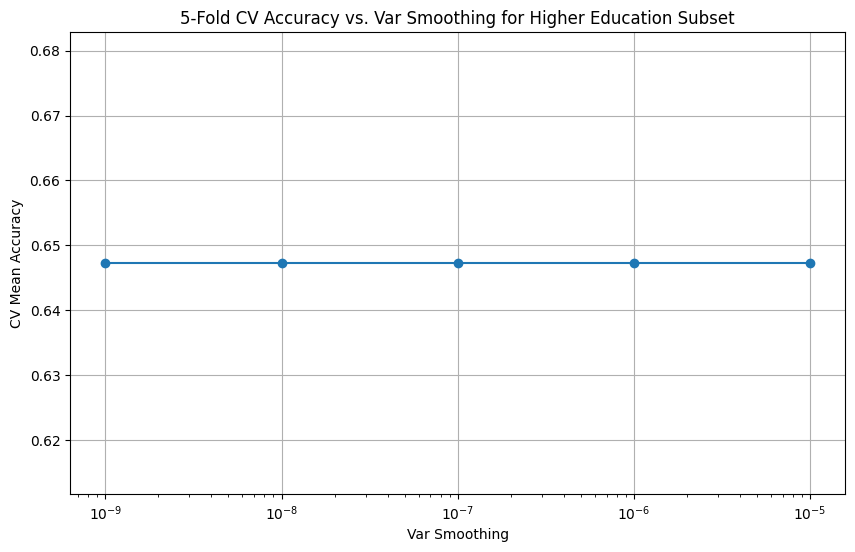

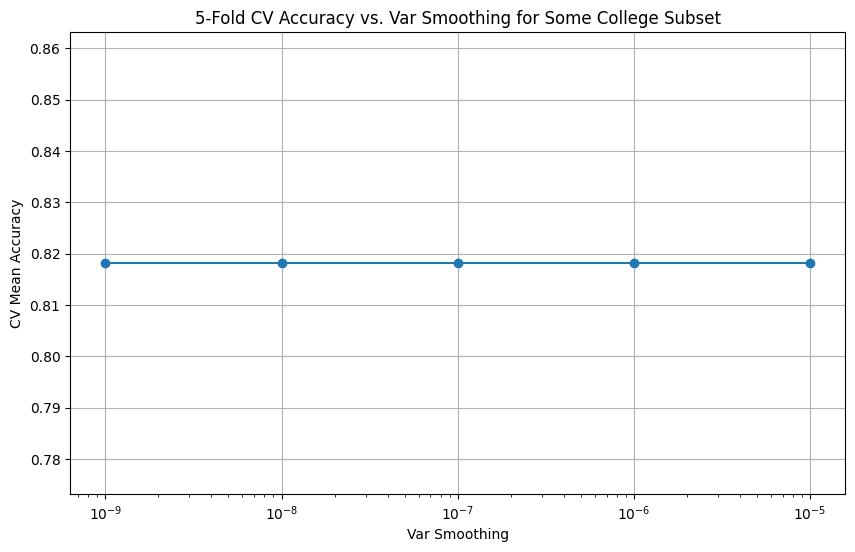

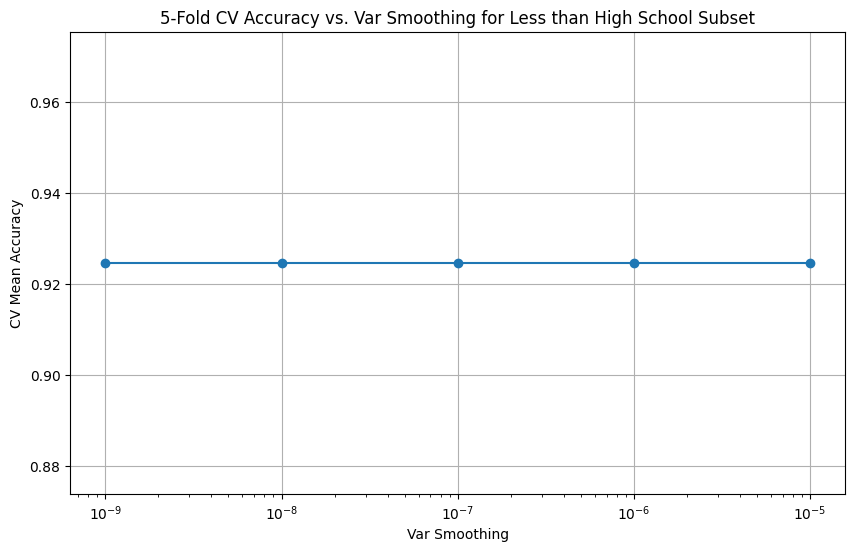

In [19]:
from sklearn.naive_bayes import GaussianNB


def tune_naive_bayes(X, y, var_smoothing_values, title):
    X = X.copy()
    y = y.copy()
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    mean_cv_scores_nb = []
    
    for var_smoothing in var_smoothing_values:
        nb_clf = GaussianNB(var_smoothing=var_smoothing)
        cv_scores = cross_val_score(nb_clf, X, y, cv=5)
        mean_cv_scores_nb.append(np.mean(cv_scores))
    
    plt.figure(figsize=(10, 6))
    plt.semilogx(var_smoothing_values, mean_cv_scores_nb, marker='o', base=10)
    plt.title(f'5-Fold CV Accuracy vs. Var Smoothing for {title}')
    plt.xlabel('Var Smoothing')
    plt.ylabel('CV Mean Accuracy')
    plt.grid(True)
    plt.savefig('./pa2b_pics/NB_'+title+'.png')
    plt.show()

var_smoothing_values = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]

tune_naive_bayes(X_higher_ed_pca_train, y_higher_ed_pca_train, var_smoothing_values, "Higher Education Subset")
tune_naive_bayes(X_some_college_pca_train, y_some_college_pca_train, var_smoothing_values, "Some College Subset")
tune_naive_bayes(X_less_than_hs_pca_train, y_less_than_hs_pca_train, var_smoothing_values, "Less than High School Subset")

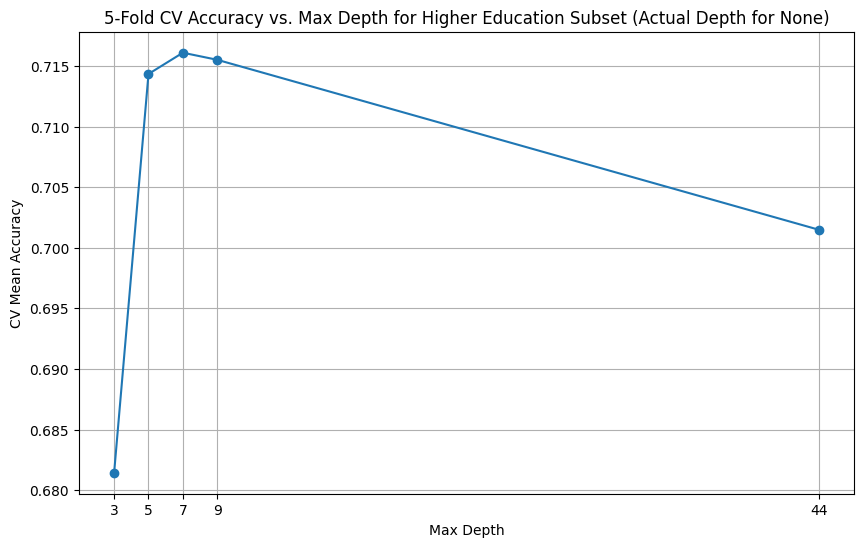

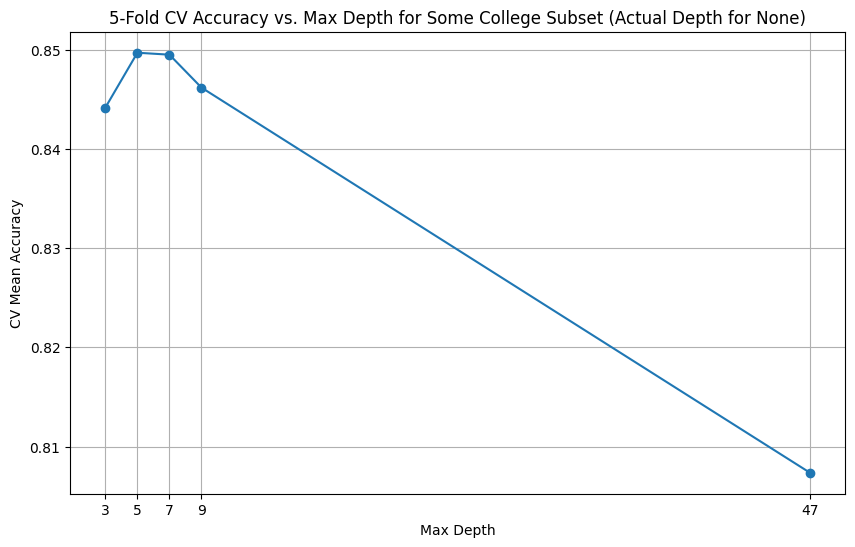

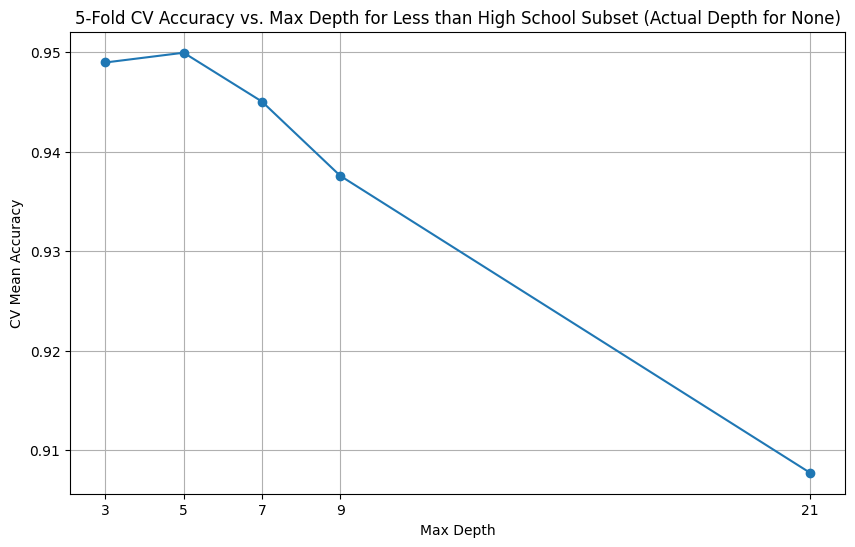

In [20]:
from sklearn.tree import DecisionTreeClassifier

    
def tune_decision_tree(X, y, max_depth_values, title):
    X = X.copy()
    y = y.copy()
    mean_cv_scores_dt = []
    depths_for_plot = max_depth_values.copy()  # Copy the list to avoid modifying the original
    
    for depth in max_depth_values:
        if depth is None:
            # Fit the tree without depth restriction
            dt_clf = DecisionTreeClassifier(max_depth=None)
            dt_clf.fit(X, y)  # Fit the model to find out the actual depth
            actual_depth = dt_clf.get_depth()  # Get the actual depth of the tree
            depths_for_plot[-1] = actual_depth  # Replace None with actual depth for plotting
        # else:
        dt_clf = DecisionTreeClassifier(max_depth=depth)
        
        cv_scores = cross_val_score(dt_clf, X, y, cv=5)
        mean_cv_scores_dt.append(np.mean(cv_scores))
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(depths_for_plot, mean_cv_scores_dt, marker='o')
    plt.title(f'5-Fold CV Accuracy vs. Max Depth for {title} (Actual Depth for None)')
    plt.xlabel('Max Depth')
    plt.ylabel('CV Mean Accuracy')
    plt.grid(True)
    plt.xticks(depths_for_plot)
    plt.savefig('./pa2b_pics/DecisionTree_'+title+'.png')
    plt.show()


# Define the list of max_depth values to test
max_depth_values = [3, 5, 7, 9, None]

tune_decision_tree(X_higher_ed_pca_train, y_higher_ed_pca_train, max_depth_values, "Higher Education Subset")
tune_decision_tree(X_some_college_pca_train, y_some_college_pca_train, max_depth_values, "Some College Subset")
tune_decision_tree(X_less_than_hs_pca_train, y_less_than_hs_pca_train, max_depth_values, "Less than High School Subset")

1. K-Nearest Neighbors (KNN)

In [21]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

def evaluate_knn(X_train, y_train, X_test, y_test, k, title):
    print(title)
    # 标准化训练和测试数据
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # 使用最佳的 k 值训练模型
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    start_time=time.time()
    knn_clf.fit(X_train_scaled, y_train)
    y_pred = knn_clf.predict(X_train_scaled)
    end_time = time.time()
    
    accuracy = accuracy_score(y_train, y_pred)
    print(f'Train Accuracy for {title}: {accuracy:.4f}, Time is {end_time-start_time:.4f}')
    print('Classification Report:')
    print(classification_report(y_train, y_pred))
    
    # 在测试集上进行预测
    start_time=time.time()
    y_pred = knn_clf.predict(X_test_scaled)
    end_time = time.time()
    
    # 计算并打印性能指标
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Test Accuracy for {title}: {accuracy:.4f}, Time is {end_time-start_time:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

# 对每个子集调用评估函数
evaluate_knn(X_higher_ed_pca_train, y_higher_ed_pca_train, X_higher_ed_pca_test, y_higher_ed_pca_test, 9, "Higher Education Subset")
evaluate_knn(X_some_college_pca_train, y_some_college_pca_train, X_some_college_pca_test, y_some_college_pca_test, 9, "Some College Subset")
evaluate_knn(X_less_than_hs_pca_train, y_less_than_hs_pca_train, X_less_than_hs_pca_test, y_less_than_hs_pca_test, 9, "Less than High School Subset")


Higher Education Subset
Train Accuracy for Higher Education Subset: 0.7681, Time is 0.2322
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      5282
           1       0.75      0.77      0.76      4989

    accuracy                           0.77     10271
   macro avg       0.77      0.77      0.77     10271
weighted avg       0.77      0.77      0.77     10271

Test Accuracy for Higher Education Subset: 0.6681, Time is 0.0249
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       569
           1       0.67      0.66      0.67       573

    accuracy                           0.67      1142
   macro avg       0.67      0.67      0.67      1142
weighted avg       0.67      0.67      0.67      1142

Some College Subset
Train Accuracy for Some College Subset: 0.8563, Time is 0.6022
Classification Report:
              precision    recall  f1

2. Artificial Neural Network (ANN)

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

def evaluate_ann(X_train, y_train, X_test, y_test, hidden_layer_size, title):
    print(title)
    # 标准化训练和测试数据
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # 使用最佳的隐藏层配置训练模型
    start_time=time.time()
    ann_clf = MLPClassifier(hidden_layer_sizes=hidden_layer_size, activation='relu', max_iter=1000)
    ann_clf.fit(X_train_scaled, y_train)
    y_pred = ann_clf.predict(X_train_scaled)
    end_time = time.time()
    
    accuracy = accuracy_score(y_train, y_pred)
    print(f'Train Accuracy for {title}: {accuracy:.4f}, Time is {end_time-start_time:.4f}')
    print('Classification Report:')
    print(classification_report(y_train, y_pred))
    
    # 在测试集上进行预测
    start_time = time.time()
    y_pred = ann_clf.predict(X_test_scaled)
    end_time = time.time()
    
    # 计算并打印性能指标
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {title}: {accuracy:.4f},Time is {end_time-start_time:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

# 对每个子集调用评估函数
evaluate_ann(X_higher_ed_pca_train, y_higher_ed_pca_train, X_higher_ed_pca_test, y_higher_ed_pca_test, (50,50,50), "Higher Education Subset")
evaluate_ann(X_some_college_pca_train, y_some_college_pca_train, X_some_college_pca_test, y_some_college_pca_test, (100,100), "Some College Subset")
evaluate_ann(X_less_than_hs_pca_train, y_less_than_hs_pca_train, X_less_than_hs_pca_test, y_less_than_hs_pca_test, (50,), "Less than High School Subset")


Higher Education Subset
Train Accuracy for Higher Education Subset: 0.7492, Time is 14.2554
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      5282
           1       0.73      0.77      0.75      4989

    accuracy                           0.75     10271
   macro avg       0.75      0.75      0.75     10271
weighted avg       0.75      0.75      0.75     10271

Accuracy for Higher Education Subset: 0.7154,Time is 0.0010
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       569
           1       0.71      0.74      0.72       573

    accuracy                           0.72      1142
   macro avg       0.72      0.72      0.72      1142
weighted avg       0.72      0.72      0.72      1142

Some College Subset
Train Accuracy for Some College Subset: 0.8477, Time is 37.4545
Classification Report:
              precision    recall  f1-sco

3. Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

def evaluate_decision_tree(X_train, y_train, X_test, y_test, max_depth, title):
    # 使用最佳的最大深度配置训练模型
    print(title)
    start_time=time.time()
    dt_clf = DecisionTreeClassifier(max_depth=max_depth)
    dt_clf.fit(X_train, y_train)
    y_pred = dt_clf.predict(X_train)
    end_time = time.time()
    
    accuracy = accuracy_score(y_train, y_pred)
    print(f'Train Accuracy for {title}: {accuracy:.4f}, Time is {end_time-start_time:.4f}')
    print('Classification Report:')
    print(classification_report(y_train, y_pred))
    
    # 在测试集上进行预测
    start_time = time.time()
    y_pred = dt_clf.predict(X_test)
    end_time = time.time()
    # 计算并打印性能指标
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {title}: {accuracy:.4f},Time is {end_time-start_time:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

# 对每个子集调用评估函数
#evaluate_decision_tree(X_higher_ed_train, y_higher_ed_train, X_higher_ed_test, y_higher_ed_test, 7, "Higher Education Subset")
evaluate_decision_tree(X_higher_ed_pca_train, y_higher_ed_pca_train, X_higher_ed_pca_test, y_higher_ed_pca_test, 7, "Higher Education Subset")
evaluate_decision_tree(X_some_college_pca_train, y_some_college_pca_train, X_some_college_pca_test, y_some_college_pca_test, 5, "Some College Subset")
evaluate_decision_tree(X_less_than_hs_pca_train, y_less_than_hs_pca_train, X_less_than_hs_pca_test, y_less_than_hs_pca_test, 5, "Less than High School Subset")


Higher Education Subset
Train Accuracy for Higher Education Subset: 0.7380, Time is 0.0289
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      5282
           1       0.71      0.78      0.74      4989

    accuracy                           0.74     10271
   macro avg       0.74      0.74      0.74     10271
weighted avg       0.74      0.74      0.74     10271

Accuracy for Higher Education Subset: 0.7110,Time is 0.0000
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       569
           1       0.70      0.76      0.72       573

    accuracy                           0.71      1142
   macro avg       0.71      0.71      0.71      1142
weighted avg       0.71      0.71      0.71      1142

Some College Subset
Train Accuracy for Some College Subset: 0.8502, Time is 0.0518
Classification Report:
              precision    recall  f1-score

4. Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

def evaluate_random_forest(X_train, y_train, X_test, y_test, n_estimators, title):
    # 使用最佳的树的数量配置训练模型
    print(title)
    start_time=time.time()
    rf_clf = RandomForestClassifier(n_estimators=n_estimators)
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_train)
    end_time = time.time()
    
    accuracy = accuracy_score(y_train, y_pred)
    print(f'Train Accuracy for {title}: {accuracy:.4f}, Time is {end_time-start_time:.4f}')
    print('Classification Report:')
    print(classification_report(y_train, y_pred))
    
    # 在测试集上进行预测
    start_time = time.time()
    y_pred = rf_clf.predict(X_test)
    end_time = time.time()
    # 计算并打印性能指标
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {title}: {accuracy:.4f},Time is {end_time-start_time:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

# 对每个子集调用评估函数
#evaluate_random_forest(X_higher_ed_train, y_higher_ed_train, X_higher_ed_test, y_higher_ed_test, 100, "Higher Education Subset")
evaluate_random_forest(X_higher_ed_pca_train, y_higher_ed_pca_train, X_higher_ed_pca_test, y_higher_ed_pca_test, 100, "Higher Education Subset")
evaluate_random_forest(X_some_college_pca_train, y_some_college_pca_train, X_some_college_pca_test, y_some_college_pca_test, 100, "Some College Subset")
evaluate_random_forest(X_less_than_hs_pca_train, y_less_than_hs_pca_train, X_less_than_hs_pca_test, y_less_than_hs_pca_test, 50, "Less than High School Subset")


Higher Education Subset
Train Accuracy for Higher Education Subset: 0.9723, Time is 1.4652
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      5282
           1       0.97      0.98      0.97      4989

    accuracy                           0.97     10271
   macro avg       0.97      0.97      0.97     10271
weighted avg       0.97      0.97      0.97     10271

Accuracy for Higher Education Subset: 0.7347,Time is 0.0130
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       569
           1       0.74      0.73      0.73       573

    accuracy                           0.73      1142
   macro avg       0.73      0.73      0.73      1142
weighted avg       0.73      0.73      0.73      1142

Some College Subset
Train Accuracy for Some College Subset: 0.9653, Time is 3.6809
Classification Report:
              precision    recall  f1-score

5. Naïve Bayes Classifier

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

def evaluate_naive_bayes(X_train, y_train, X_test, y_test, var_smoothing, title):
    # 标准化训练和测试数据
    print(title)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # 使用最佳的var_smoothing值配置训练模型
    start_time=time.time()
    nb_clf = GaussianNB(var_smoothing=var_smoothing)
    nb_clf.fit(X_train_scaled, y_train)
    y_pred = nb_clf.predict(X_train_scaled)
    end_time = time.time()
    
    accuracy = accuracy_score(y_train, y_pred)
    print(f'Train Accuracy for {title}: {accuracy:.4f}, Time is {end_time-start_time:.4f}')
    print('Classification Report:')
    print(classification_report(y_train, y_pred))
    
    # 在测试集上进行预测
    start_time = time.time()
    y_pred = nb_clf.predict(X_test_scaled)
    end_time = time.time()
    # 计算并打印性能指标
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {title}: {accuracy:.4f},Time is {end_time-start_time:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

# 对每个子集调用评估函数
#evaluate_naive_bayes(X_higher_ed_train, y_higher_ed_train, X_higher_ed_test, y_higher_ed_test, 1e-5, "Higher Education Subset")
evaluate_naive_bayes(X_higher_ed_pca_train, y_higher_ed_pca_train, X_higher_ed_pca_test, y_higher_ed_pca_test, 1e-5, "Higher Education Subset")
evaluate_naive_bayes(X_some_college_pca_train, y_some_college_pca_train, X_some_college_pca_test, y_some_college_pca_test, 1e-5, "Some College Subset")
evaluate_naive_bayes(X_less_than_hs_pca_train, y_less_than_hs_pca_train, X_less_than_hs_pca_test, y_less_than_hs_pca_test, 1e-5, "Less than High School Subset")


Higher Education Subset
Train Accuracy for Higher Education Subset: 0.6475, Time is 0.0030
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.93      0.73      5282
           1       0.83      0.35      0.49      4989

    accuracy                           0.65     10271
   macro avg       0.71      0.64      0.61     10271
weighted avg       0.71      0.65      0.61     10271

Accuracy for Higher Education Subset: 0.6401,Time is 0.0010
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.91      0.72       569
           1       0.81      0.37      0.51       573

    accuracy                           0.64      1142
   macro avg       0.70      0.64      0.61      1142
weighted avg       0.70      0.64      0.61      1142

Some College Subset
Train Accuracy for Some College Subset: 0.8182, Time is 0.0050
Classification Report:
              precision    recall  f1-score

6. Support Vector Machine (SVM)

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

def evaluate_svm(X_train, y_train, X_test, y_test, kernel, title):
    # 标准化训练和测试数据
    print(title)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # 使用最佳的核函数配置训练模型
    start_time=time.time()
    svm_clf = SVC(kernel=kernel)
    svm_clf.fit(X_train_scaled, y_train)
    y_pred = svm_clf.predict(X_train_scaled)
    end_time = time.time()
    
    accuracy = accuracy_score(y_train, y_pred)
    print(f'Train Accuracy for {title}: {accuracy:.4f}, Time is {end_time-start_time:.4f}')
    print('Classification Report:')
    print(classification_report(y_train, y_pred))
    
    # 在测试集上进行预测
    start_time=time.time()
    y_pred = svm_clf.predict(X_test_scaled)
    end_time = time.time()
    # 计算并打印性能指标
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {title}: {accuracy:.4f},Time is {end_time-start_time:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

# 对每个子集调用评估函数
#evaluate_svm(X_higher_ed_train, y_higher_ed_train, X_higher_ed_test, y_higher_ed_test, 'rbf', "Higher Education Subset")
evaluate_svm(X_higher_ed_pca_train, y_higher_ed_pca_train, X_higher_ed_pca_test, y_higher_ed_pca_test, 'rbf', "Higher Education Subset")
evaluate_svm(X_some_college_pca_train, y_some_college_pca_train, X_some_college_pca_test, y_some_college_pca_test, 'rbf', "Some College Subset")
evaluate_svm(X_less_than_hs_pca_train, y_less_than_hs_pca_train, X_less_than_hs_pca_test, y_less_than_hs_pca_test, 'rbf', "Less than High School Subset")


Higher Education Subset
Train Accuracy for Higher Education Subset: 0.7186, Time is 3.7155
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.72      5282
           1       0.71      0.72      0.71      4989

    accuracy                           0.72     10271
   macro avg       0.72      0.72      0.72     10271
weighted avg       0.72      0.72      0.72     10271

Accuracy for Higher Education Subset: 0.6891,Time is 0.2841
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.70      0.69       569
           1       0.69      0.68      0.69       573

    accuracy                           0.69      1142
   macro avg       0.69      0.69      0.69      1142
weighted avg       0.69      0.69      0.69      1142

Some College Subset
Train Accuracy for Some College Subset: 0.8408, Time is 15.3511
Classification Report:
              precision    recall  f1-scor